Перші 10 рядків набору даних:


,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True
5,0,3,male,NaN,0,0,8.4583,Q,Third,man,True,NaN,Queenstown,no,True
6,0,1,male,54.0,0,0,51.8625,S,First,man,True,E,Southampton,no,True
7,0,3,male,2.0,3,1,21.0750,S,Third,child,False,NaN,Southampton,no,False
8,1,3,female,27.0,0,2,11.1333,S,Third,woman,False,NaN,Southampton,yes,False
9,1,2,female,14.0,1,0,30.0708,C,Second,child,False,NaN,Cherbourg,yes,False



Базова статистика:
         survived      pclass         age       sibsp       parch        fare
count  891.000000  891.000000  714.000000  891.000000  891.000000  891.000000
mean     0.383838    2.308642   29.699118    0.523008    0.381594   32.204208
std      0.486592    0.836071   14.526497    1.102743    0.806057   49.693429
min      0.000000    1.000000    0.420000    0.000000    0.000000    0.000000
25%      0.000000    2.000000   20.125000    0.000000    0.000000    7.910400
50%      0.000000    3.000000   28.000000    0.000000    0.000000   14.454200
75%      1.000000    3.000000   38.000000    1.000000    0.000000   31.000000
max      1.000000    3.000000   80.000000    8.000000    6.000000  512.329200

Перевірка пропущених значень:
survived         0
pclass           0
sex              0
age            177
sibsp            0
parch            0
fare             0
embarked         2
class            0
who              0
adult_male       0
deck           688
embark_town      2


,survived,pclass,age,sibsp,parch,fare,sex_male,embarked_Q,embarked_S,class_Second,class_Third,FamilySize
0,0,3,22.0,1,0,7.2500,True,False,True,False,True,1
1,1,1,38.0,1,0,71.2833,False,False,False,False,False,1
2,1,3,26.0,0,0,7.9250,False,False,True,False,True,0
3,1,1,35.0,1,0,53.1000,False,False,True,False,False,1
4,0,3,35.0,0,0,8.0500,True,False,True,False,True,0



Логістична регресія:
Точність (Accuracy): 0.7989
Точність (Precision): 0.7879
Повнота (Recall): 0.7027
F1-міра (F1-score): 0.7429

Дерева рішень:
Точність (Accuracy): 0.7821
Точність (Precision): 0.7397
Повнота (Recall): 0.7297
F1-міра (F1-score): 0.7347

Випадковий ліс:
Точність (Accuracy): 0.8212
Точність (Precision): 0.8000
Повнота (Recall): 0.7568
F1-міра (F1-score): 0.7778

Матриця плутанини для Logistic Regression:


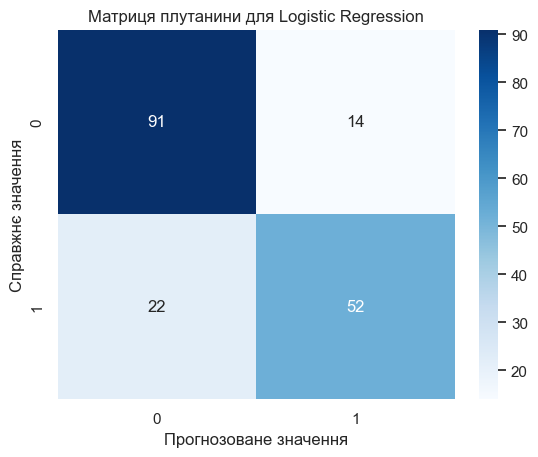


Матриця плутанини для Decision Tree:


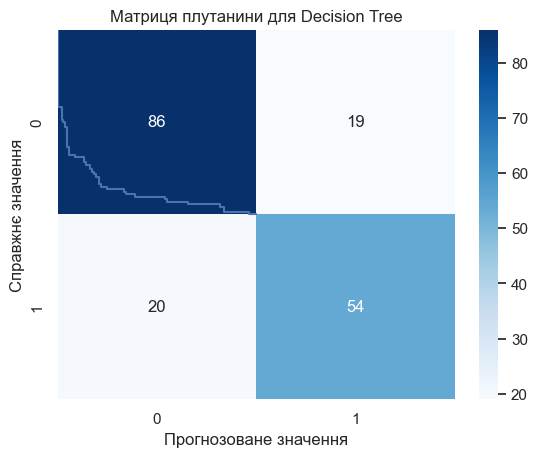


Матриця плутанини для Random Forest:


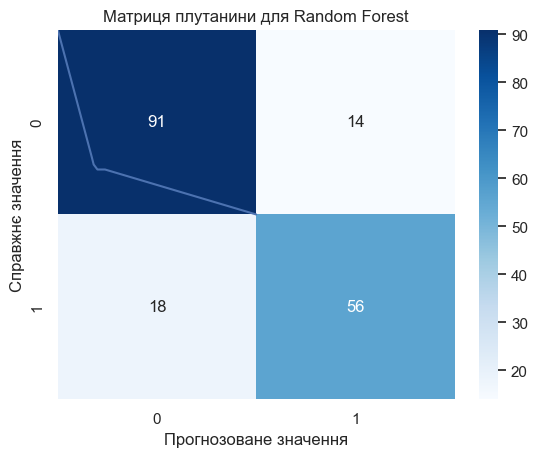

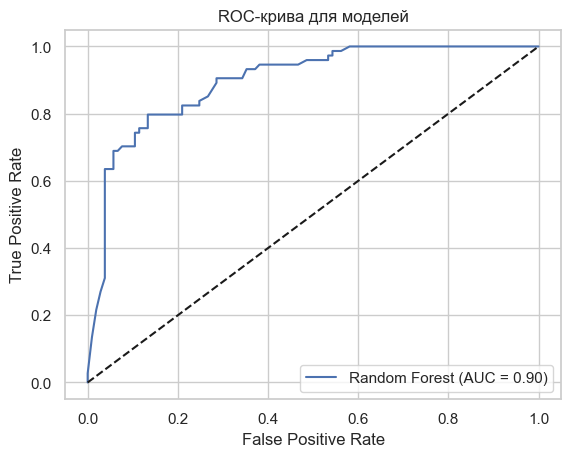


Крос-валідація для Логістичної регресії:
Середня точність крос-валідації: 0.7935095097608437

Оптимізація гіперпараметрів для випадкового лісу:
Найкращі параметри для випадкового лісу: {'max_depth': 10, 'min_samples_split': 10, 'n_estimators': 200}

Вибір найкращої моделі на основі метрик точності, precision, recall, F1-score.


In [3]:
# Лабораторна робота 4: Аналіз даних на прикладі набору Titanic
# Імпорт необхідних бібліотек
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, roc_curve, auc
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

# Візуалізація
sns.set(style="whitegrid")

# Завантаження даних
from seaborn import load_dataset
data = load_dataset("titanic")

# Ознайомлення з даними
print("Перші 10 рядків набору даних:")
display(data.head(10))

# Базова статистика та перевірка пропущених значень
print("\nБазова статистика:")
print(data.describe())
print("\nПеревірка пропущених значень:")
print(data.isnull().sum())

# Попередня обробка даних

# Заповнення пропущених значень у змінній Age середнім значенням
data['age'].fillna(data['age'].mean(), inplace=True)

# Заповнення пропущених значень у змінній Embarked найбільш поширеним значенням (модою)
data['embarked'].fillna(data['embarked'].mode()[0], inplace=True)

# Закодування категоріальних змінних
data = pd.get_dummies(data, columns=['sex', 'embarked', 'class'], drop_first=True)

# Створення нової ознаки FamilySize
data['FamilySize'] = data['sibsp'] + data['parch']

# Видалення непотрібних стовпців
data.drop(['who', 'deck', 'embark_town', 'alive', 'adult_male', 'alone'], axis=1, inplace=True)

# Перевірка оброблених даних
print("\nПеревірка оброблених даних:")
display(data.head())

# Поділ даних на тренувальну та тестову вибірки
X = data.drop('survived', axis=1)
y = data['survived']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Побудова моделей

# Функція для оцінки моделі
def evaluate_model(model, X_train, y_train, X_test, y_test):
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    print(f"Точність (Accuracy): {accuracy:.4f}")
    print(f"Точність (Precision): {precision:.4f}")
    print(f"Повнота (Recall): {recall:.4f}")
    print(f"F1-міра (F1-score): {f1:.4f}")
    return y_pred

# Логістична регресія
print("\nЛогістична регресія:")
log_reg = LogisticRegression()
y_pred_log = evaluate_model(log_reg, X_train, y_train, X_test, y_test)

# Дерева рішень
print("\nДерева рішень:")
tree_clf = DecisionTreeClassifier(random_state=42)
y_pred_tree = evaluate_model(tree_clf, X_train, y_train, X_test, y_test)

# Випадковий ліс
print("\nВипадковий ліс:")
rf_clf = RandomForestClassifier(random_state=42)
y_pred_rf = evaluate_model(rf_clf, X_train, y_train, X_test, y_test)

# Оцінка результатів: матриця плутанини та ROC-крива
models = [("Logistic Regression", log_reg, y_pred_log), ("Decision Tree", tree_clf, y_pred_tree), ("Random Forest", rf_clf, y_pred_rf)]

for name, model, y_pred in models:
    print(f"\nМатриця плутанини для {name}:")
    cm = confusion_matrix(y_test, y_pred)
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
    plt.title(f"Матриця плутанини для {name}")
    plt.xlabel("Прогнозоване значення")
    plt.ylabel("Справжнє значення")
    plt.show()

    # ROC-крива та AUC
    y_proba = model.predict_proba(X_test)[:, 1]
    fpr, tpr, thresholds = roc_curve(y_test, y_proba)
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr, tpr, label=f'{name} (AUC = {roc_auc:.2f})')
    
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC-крива для моделей")
plt.legend(loc="lower right")
plt.show()

# Оптимізація моделі
# Крос-валідація для логістичної регресії
print("\nКрос-валідація для Логістичної регресії:")
log_cv_scores = cross_val_score(log_reg, X, y, cv=5)
print("Середня точність крос-валідації:", log_cv_scores.mean())

# Оптимізація гіперпараметрів для випадкового лісу
print("\nОптимізація гіперпараметрів для випадкового лісу:")
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10]
}
grid_search = GridSearchCV(rf_clf, param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train, y_train)
print("Найкращі параметри для випадкового лісу:", grid_search.best_params_)

# Порівняння моделей та вибір найкращої
print("\nВибір найкращої моделі на основі метрик точності, precision, recall, F1-score.")

